In this notebook, we analyse the characteristics of the biased cluster.
We would like to know the following:
- What are the most common values for each feature?
- How can we visualize the essential components of this cluster?
- What is the distribution of the classes in this cluster? Is the classifier underperforming on one class?
- What type of misclassifications is most present in this cluster?


TODO:
- Analyse the centroids of the clusters with a high bias
- Create parallel-coordinate plots for the clusters with a high bias. Each datapoint is the centroid of a cluster. We order all the datapoints on magnitude of bias. (advantage: applicable for multiclass & represents the importance of features & shows the patterns of the biased clusters)
- Add the bias per cluster as new column in the dataframe



In [5]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [21]:
biased_clusters = pd.read_csv(r'../Clustered_datasets/biased_wine.csv', index_col=0)
# biased_clusters = biased_clusters.drop(['new_clusters'])
biased_clusters.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
12  0.687846   -0.160373  0.141557          -0.694417  -0.834587   
23 -0.356751   -0.343481  0.502356          -0.101678  -0.381526   
25 -0.124619    0.290352  2.798346           2.269277   1.808272   
35  0.374467   -0.047692  0.141557           0.787430  -0.003974   
13  1.848509   -0.160373  0.075958          -2.209194  -0.683567   

    total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
12       0.004312    0.267992             -0.318793         0.017405   
23      -0.222556   -0.278564             -0.635733        -0.650337   
25       0.061029    0.155878              1.582845         0.227267   
35       0.193369    0.576306             -0.635733         0.112797   
13       0.949596    1.571320              1.160258         1.925240   

    color_intensity       hue  od280/od315_of_diluted_wines   proline  \
12         0.697247  0.405843                     -0.146241  1.256507   
23        -0.367414 -0.033392                      1.394286  0.408775   
25        -0.590546  0.259431                      0.486852 -0.105424   
35         0.378486 -0.399421                      1.056636  0.144727   
13         0.569743  1.137900                     -0.504994  0.784001   

    true_class  predicted_class  errors  clusters  new_clusters  
12         0.0                0     0.0         8          -1.0  
23         0.0                1     1.0         9           0.0  
25         0.0                0     0.0         0          -1.0  
35         0.0                1     1.0         9           0.0  
13         0.0                2     1.0         2          -1.0

In [7]:
def accuracy(results):
    correct = results.loc[results['errors'] == 0]
    # print('Correct:', len(correct), ' -  Total:', len(results))
    acc = len(correct)/len(results)
    # print('Accuracy:', acc)
    return acc

def bias_acc(data, cluster_id, cluster_col):
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    remaining_clusters = data.loc[data[cluster_col] != cluster_id]
    return accuracy(remaining_clusters) - accuracy(cluster_x)

In [10]:
n_clusters = len(biased_clusters['clusters'].unique())
highest_bias = -999
highest_bias_cluster_n = -1

for i in range(0, n_clusters):
    neg_bias_i = bias_acc(biased_clusters, i, 'clusters')
    if neg_bias_i > highest_bias:
        highest_bias = neg_bias_i
        highest_bias_cluster_n = i

print('Highest bias found: ', highest_bias)
print('Highest biased cluster: ', highest_bias_cluster_n)


Highest bias found:  0.42592592592592593
Highest biased cluster:  10


In [23]:
bias_index = biased_clusters[biased_clusters['clusters']== highest_bias_cluster_n].index

10

# TODO plot:
- Plot to show difference between biased cluster and other clusters/datapoints (in different colours)
- Going back to the unscaled values in the original dataset by taking the indices of the biased clusters


In [13]:
original_preprocessed = pd.read_csv(r'../Preprocessed_datasets/preprocessed_wine.csv', index_col=0)
original_preprocessed["analysis_plot"] = "remain"
#original_preprocessed[original_preprocessed.index in bias_index, "analysis_plot"] = "biased"

cluster = original_preprocessed.loc[bias_index]
cluster["analysis_plot"] = "biased"
original_preprocessed["analysis_plot"] = cluster["analysis_plot"].combine_first(original_preprocessed['analysis_plot'])
original_preprocessed.tail()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
90    12.08        1.83  2.32               18.5       81.0           1.60   
84    11.84        0.89  2.58               18.0       94.0           2.20   
18    14.19        1.59  2.48               16.5      108.0           3.30   
97    12.29        1.41  1.98               16.0       85.0           2.55   
61    12.64        1.36  2.02               16.8      100.0           2.02   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
90        1.50                  0.52             1.64             2.40  1.08   
84        2.21                  0.22             2.35             3.05  0.79   
18        3.93                  0.32             1.86             8.70  1.23   
97        2.50                  0.29             1.77             2.90  1.23   
61        1.41                  0.53             0.62             5.75  0.98   

    od280/od315_of_diluted_wines  proline  predicted_class  true_class  \
90                          2.27    480.0                0         1.0   
84                          3.08    520.0                2         1.0   
18                          2.82   1680.0                0         0.0   
97                          2.74    428.0                1         1.0   
61                          1.59    450.0                2         1.0   

    errors analysis_plot  
90     1.0        remain  
84     1.0        remain  
18     0.0        remain  
97     0.0        remain  
61     1.0        remain

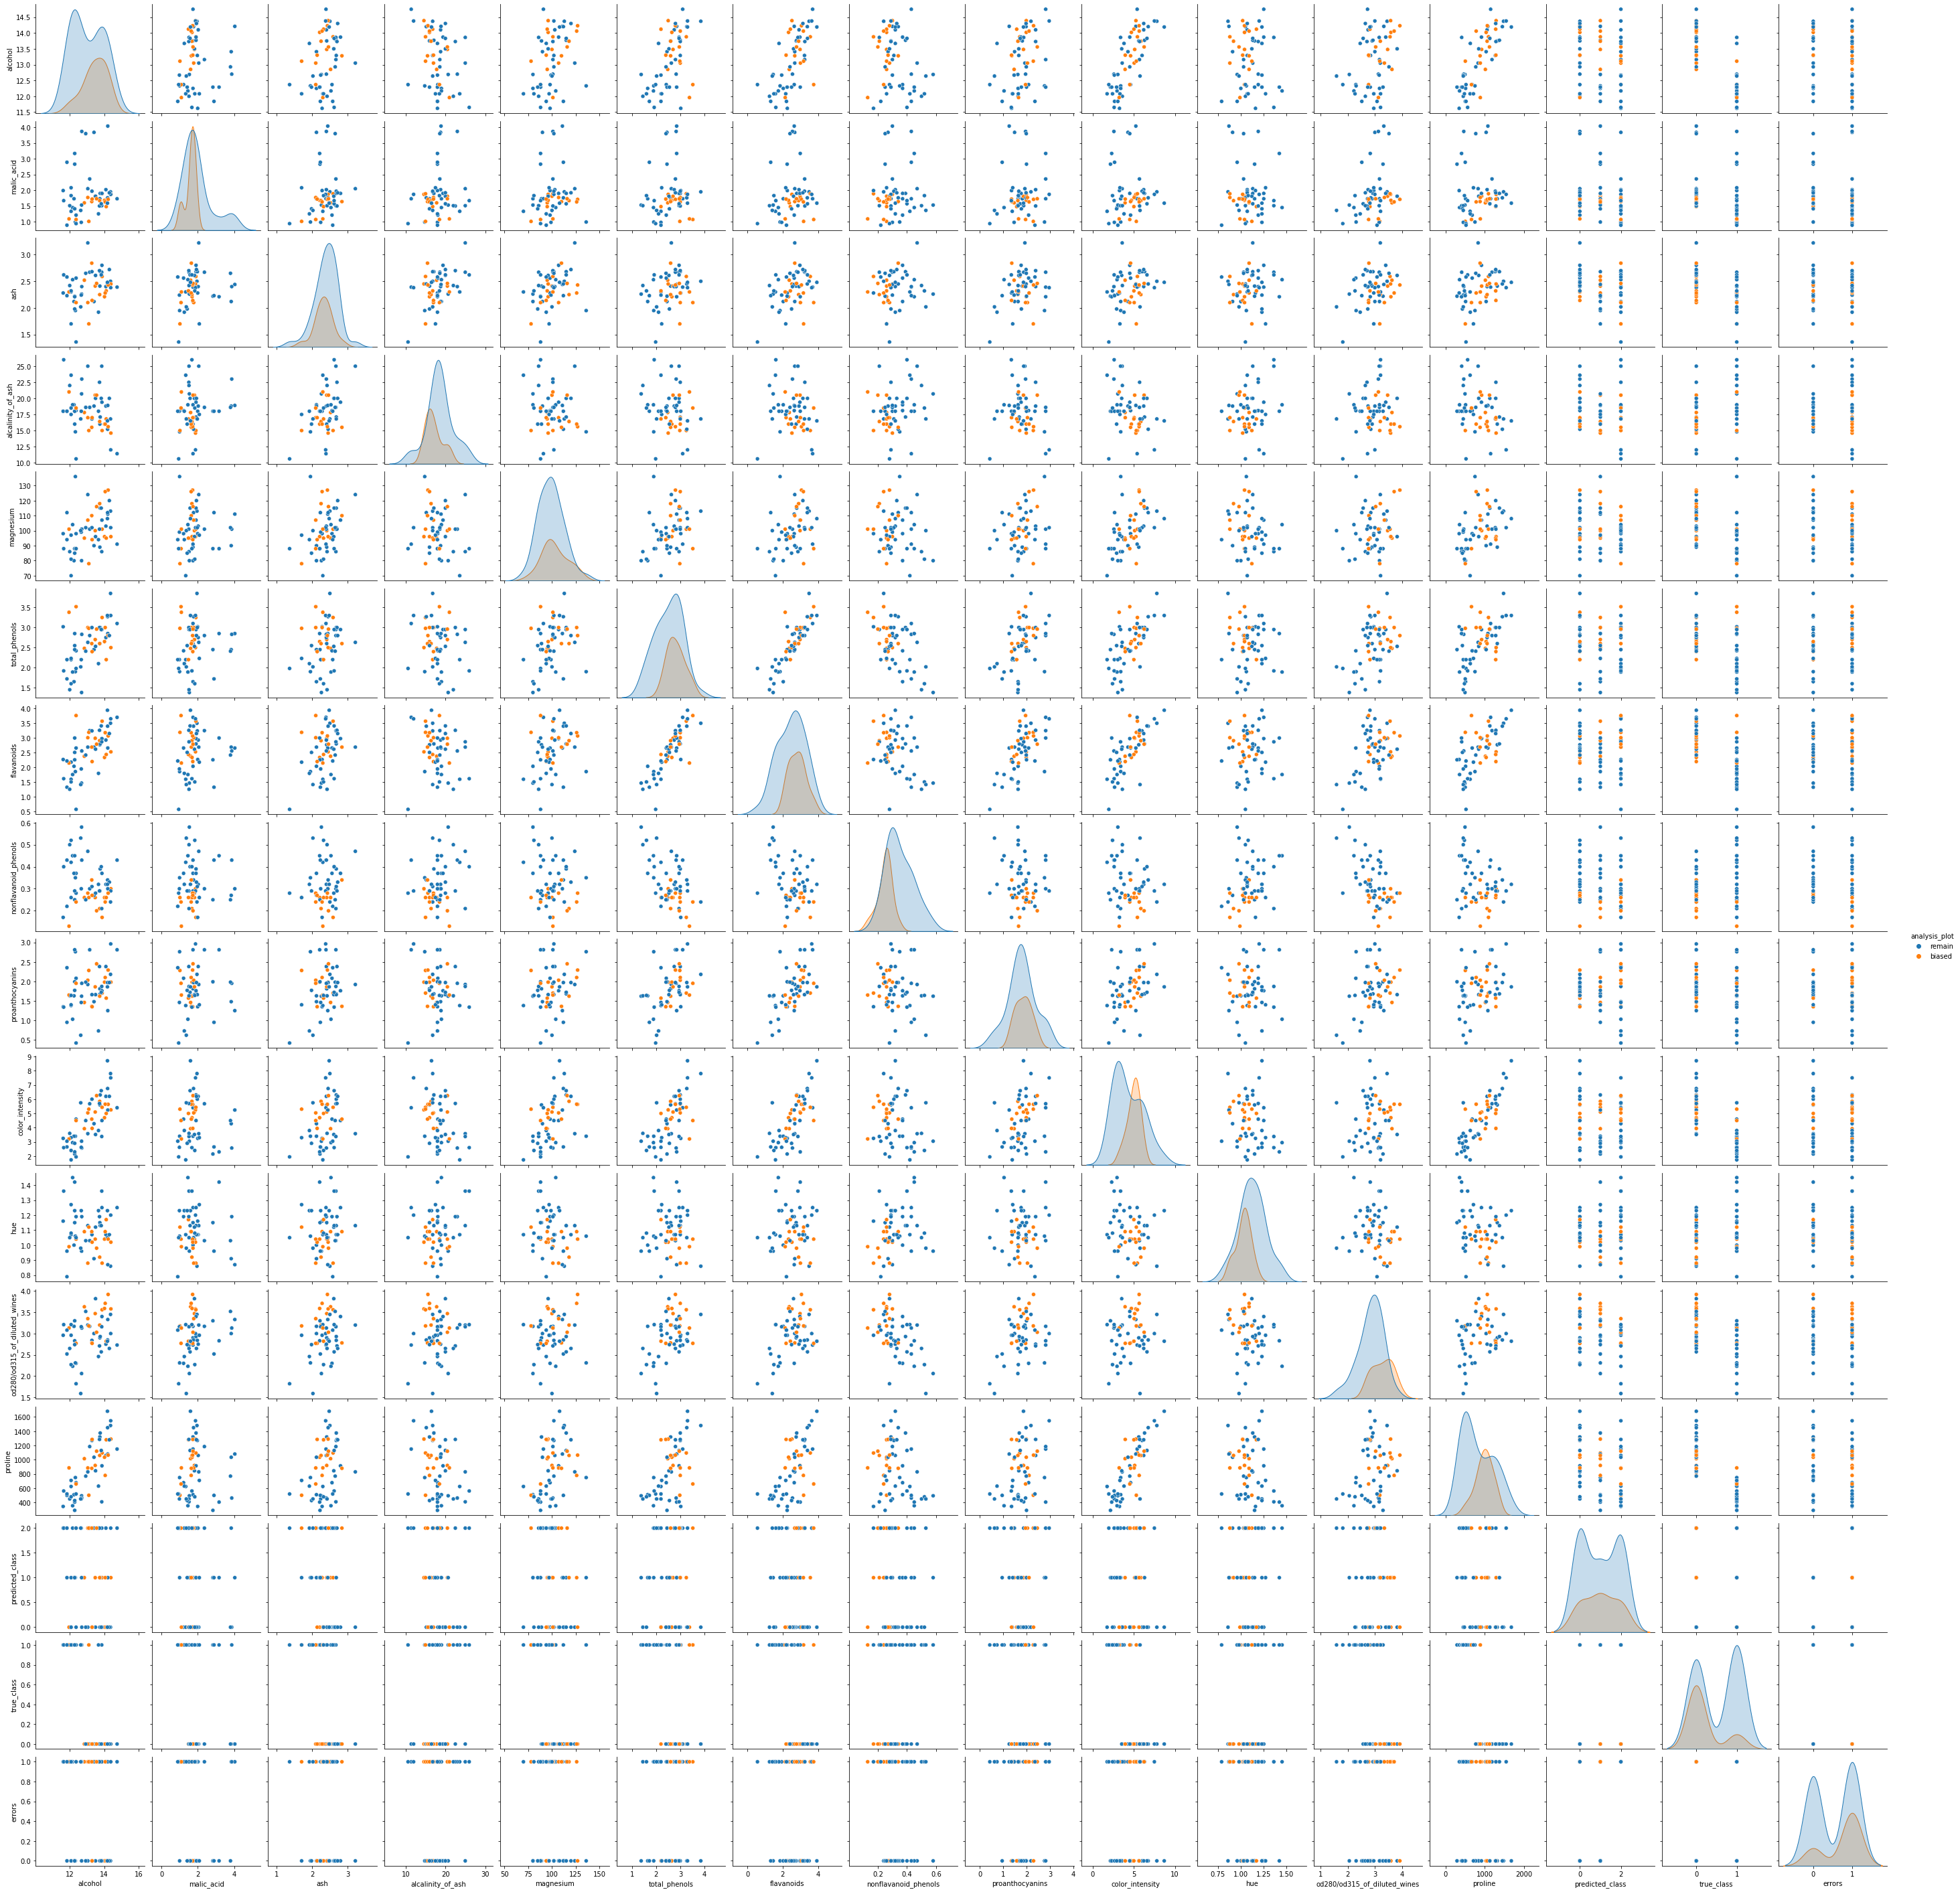

In [23]:
# sns.pairplot(original_preprocessed, hue="analysis_plot")

TODO Parallel Coordinate Plots

- centroid per cluster --> cluster_centers._ is helpful

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

- scaled values 

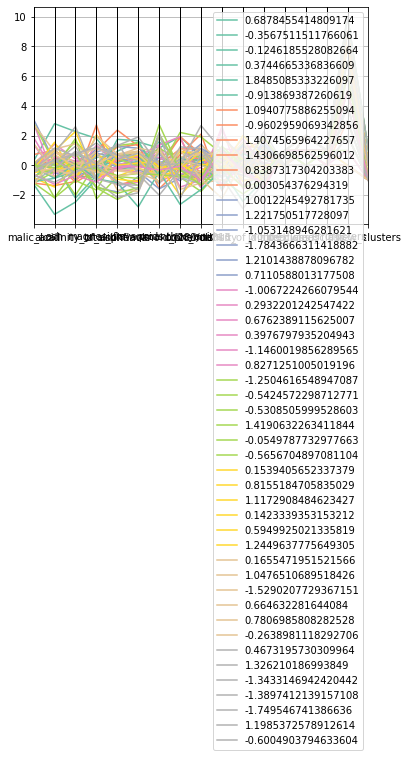

In [22]:
from pandas.plotting import parallel_coordinates

# Requires scaled values
# TODO only plot the centroids of each cluster
parallel_coordinates(biased_clusters, 'alcohol', colormap=plt.get_cmap("Set2"))
plt.show()